# 对比验证站点图

In [9]:
import os

import conda

conda_file_dir = conda.__file__

conda_dir = conda_file_dir.split('lib')[0]

proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')

os.environ["PROJ_LIB"] = proj_lib





In [4]:
!export PROJ_LIB = /opt/conda/share/proj

/bin/sh: 1: export: : bad variable name


(241, 301)
(241, 301)
(241, 301)


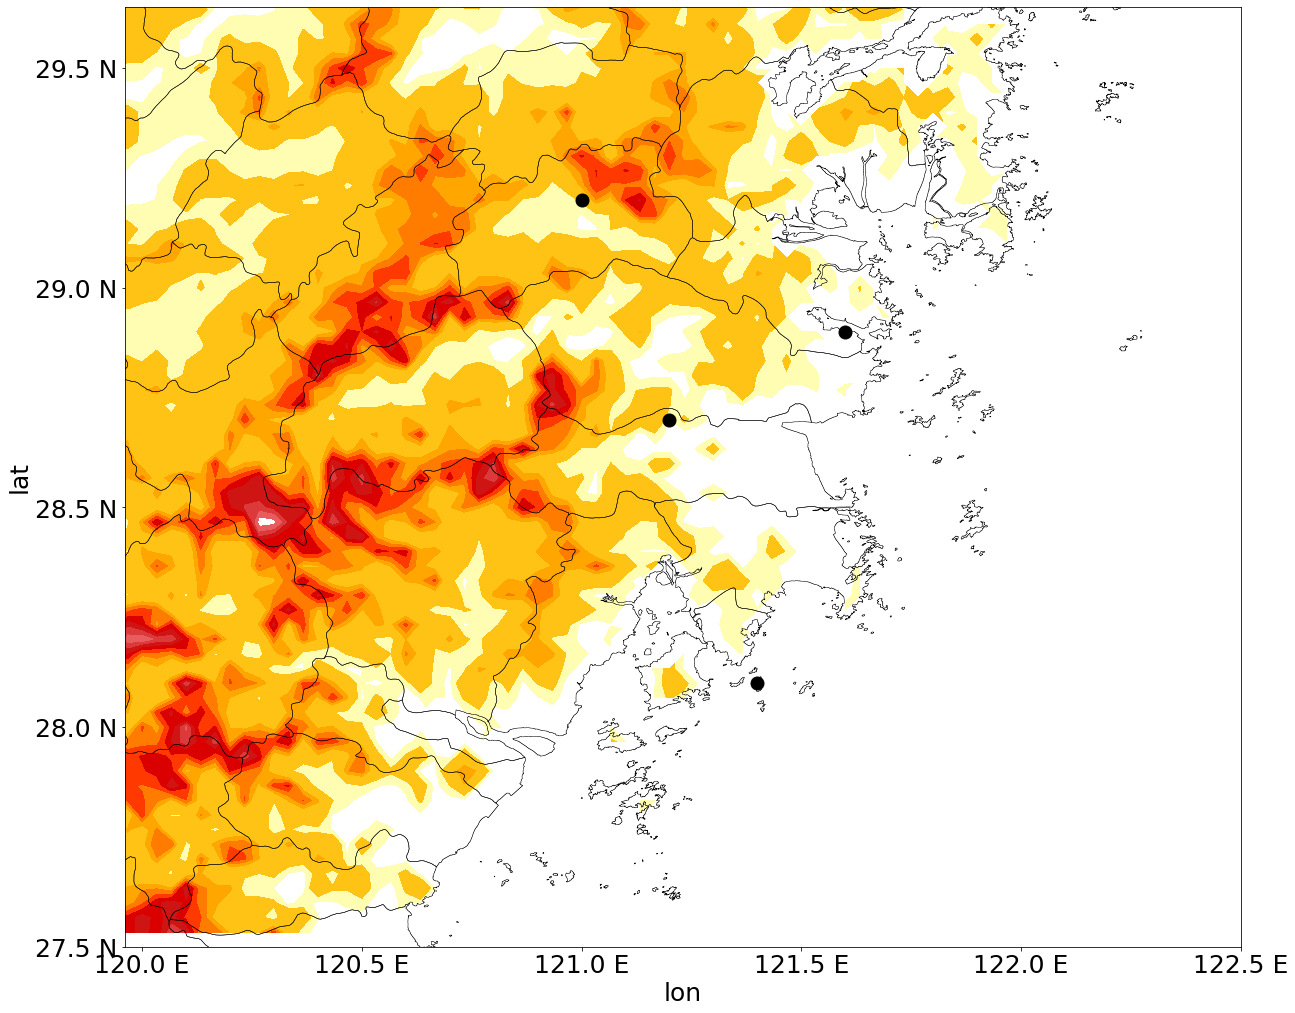

In [1]:
#!/usr/bin/python3
# author : zhangjiawei
# @time : 2019/5/31 16:36
# project_name : untitled
 
 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 
from ncmaps import Cmaps
self_define_list = [130,155,160,165,170,185,200,225,235,240,244]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/eastchina.nc')
x =geo.variables['lon']
y = geo.variables['lat']
z=  geo.variables['Band1']
f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')
name ="Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc"
u =f.variables['u'][0,0,:,:]
v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']
# 运用 Basemap 函数我们可以在绘图区域中绘制地理信息相关的图像，当参数 projection 的值为 'ortho' #时，我们将得到一个如下所示的地球仪截面：
 
fig = plt.figure(figsize=(20, 20))
# m = Basemap(projection='lcc', resolution=None,
#             width=1E6, height=1E6,
#             lat_0=27, lon_0=121, )
m=Basemap(llcrnrlon=119.96,llcrnrlat=27.56,urcrnrlon=122.15,urcrnrlat=29.64)
#m.etopo(scale=0.5, alpha=0.5)

#shpfile = "/home/liyuan3970/study_demo/met_plot/Basemap/"
shpfile = "/home/liyuan3970/Data/data/meto_data/geogphy_file/"
m.readshapefile(shpfile+'zhejiang', 'zhejiang')
#m.drawcoastlines(color='blue')
m.drawcountries(color='blue')


plt.xlabel('lon', fontsize=25)
plt.ylabel('lat', fontsize=25)


x_val_list=[120.0,120.5,121.0,121.5,122.0,122.5]
x_text_list=['120.0 E','120.5 E','121.0 E','121.5 E','122.0 E','122.5 E']
plt.xticks(x_val_list, x_text_list, fontsize=25)
y_val_list=[27.5,28.0,28.5,29.0,29.5]
y_text_list=['27.5 N','28.0 N','28.5 N','29.0 N','29.5 N']
plt.yticks(y_val_list, y_text_list, fontsize=25)


levels = [50,150,450,550,650,750,850,950,1050,1150]
lons, lats = np.meshgrid(lon[::5], lat[::5])
lons2, lats2 = np.meshgrid(x[::4], y[::4])
print(lons2.shape)
print(lats2.shape)
print(z[::4,::4].shape)
shade = m.contourf(lons2,lats2,z[::4,::4],cmap=cmaps,levels=levels)

#m.drawcountries()
# 将经纬度映射为 (x, y) 坐标，用于绘制图像
x, y = m(121.0, 29.2)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58568', fontsize=12)

x, y = m(121.6, 28.9)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58569', fontsize=12)

x, y = m(121.2, 28.7)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58653', fontsize=12)

x, y = m(121.4, 28.1)
plt.plot(x, y, 'ok', markersize=13)
#plt.text(x, y, ' 58667', fontsize=12)

# x, y = m(121.31, 28.06)
# plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' 58668', fontsize=12)

# x, y = m(121.32, 28.39)
# plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' 58664', fontsize=12)

# x_val_list=[119.9,120.2,120.5,120.8,121.1,121,4,121,7,122.0,122.3]
# x_text_list=["119.9","120.2","120.5","120.8","121.1","121,4","121,7","122.0","122.3"]
# plt.xticks(x_val_list, x_text_list)
# y_val_list=[27.5,27.7,28.0,28.3,28.6,28.9,29.2,29.5]
# y_text_list=['27.5','27.7','28.0','28.3','28.6','28.9','29.2','29.5']
# plt.yticks(y_val_list, y_text_list)
plt.savefig('../picture/4point_scater.png')
# plt.savefig('../图片包/ec数据对比/站点分布.png')
plt.show()

In [ ]:
display(Image.open("picture/RR_Geo_Scater.png"))